In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pickle

In [2]:
df = pd.read_csv("../input/cancer.csv")

In [3]:
df.drop(columns = ["id","Unnamed: 32"],inplace = True)

In [4]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
dfben = df.loc[df.diagnosis == "B",:]
dfmal = df.loc[df.diagnosis == "M",:]

In [6]:
dfbensample = dfben.sample(n=212,random_state=42)

In [7]:
df = pd.concat([dfbensample,dfmal])

In [8]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [9]:
x_mean = x.iloc[:,:10]

<Axes: >

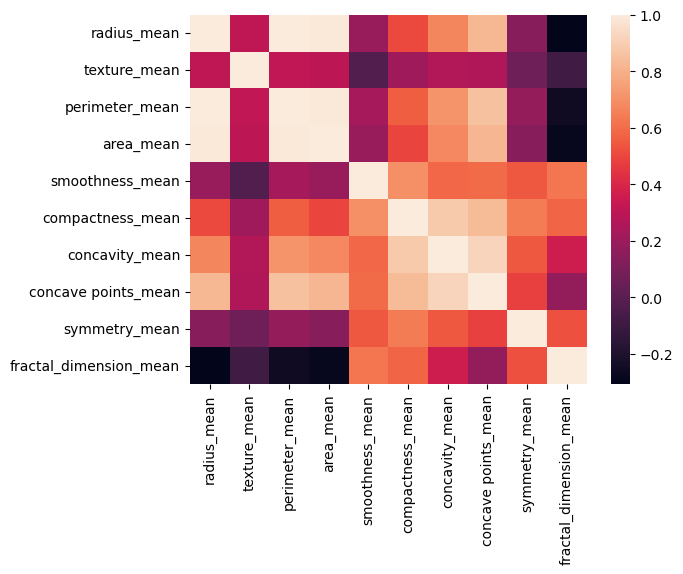

In [10]:
sns.heatmap(data=x_mean.corr())

In [11]:
x_mean.drop(columns=["perimeter_mean","area_mean","concave points_mean"],inplace = True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_29768\1743642716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_mean.drop(columns=["perimeter_mean","area_mean","concave points_mean"],inplace = True)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x_mean, y, test_size=0.3, random_state=42,stratify = y)

In [13]:
clf = DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5543478260869565, 0.9375, 'x[4] <= 0.072\nentropy = 1.0\nsamples = 296\nvalue = [148, 148]'),
 Text(0.32608695652173914, 0.8125, 'x[0] <= 14.98\nentropy = 0.422\nsamples = 140\nvalue = [128, 12]'),
 Text(0.44021739130434784, 0.875, 'True  '),
 Text(0.17391304347826086, 0.6875, 'x[1] <= 22.455\nentropy = 0.163\nsamples = 125\nvalue = [122, 3]'),
 Text(0.08695652173913043, 0.5625, 'x[2] <= 0.1\nentropy = 0.075\nsamples = 109\nvalue = [108, 1]'),
 Text(0.043478260869565216, 0.4375, 'entropy = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.13043478260869565, 0.4375, 'x[2] <= 0.1\nentropy = 0.201\nsamples = 32\nvalue = [31, 1]'),
 Text(0.08695652173913043, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17391304347826086, 0.3125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.2608695652173913, 0.5625, 'x[4] <= 0.047\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(0.21739130434782608, 0.4375, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.30

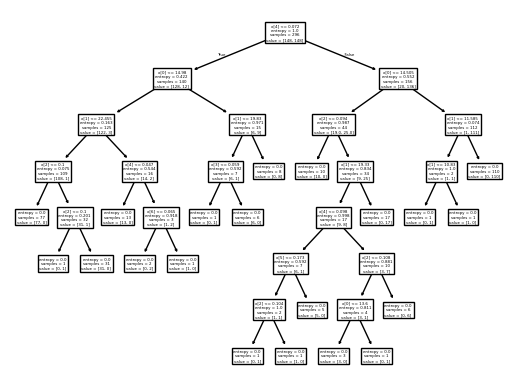

In [15]:
tree.plot_tree(clf)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
matriz = confusion_matrix(y_test, y_pred)

<Axes: >

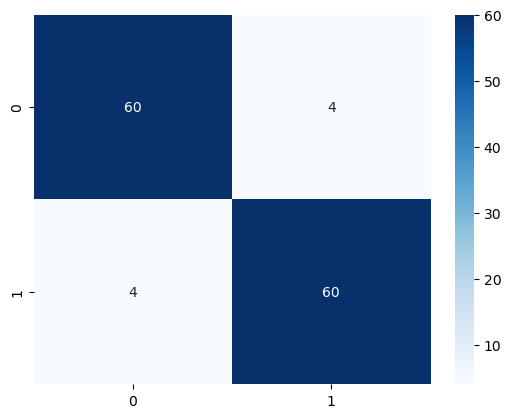

In [18]:
sns.heatmap(data = matriz, annot = True, cmap = 'Blues')

In [19]:
accuracy_score(y_test, y_pred)

0.9375

In [20]:
recall_score(y_test, y_pred, average='weighted')

0.9375

In [21]:
precision_score(y_test, y_pred, average='weighted')

0.9375

In [22]:
clf2 = DecisionTreeClassifier(criterion='gini')

In [23]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4732142857142857, 0.9444444444444444, 'x[4] <= 0.072\ngini = 0.5\nsamples = 296\nvalue = [148, 148]'),
 Text(0.26785714285714285, 0.8333333333333334, 'x[0] <= 14.98\ngini = 0.157\nsamples = 140\nvalue = [128, 12]'),
 Text(0.3705357142857143, 0.8888888888888888, 'True  '),
 Text(0.14285714285714285, 0.7222222222222222, 'x[1] <= 22.455\ngini = 0.047\nsamples = 125\nvalue = [122, 3]'),
 Text(0.07142857142857142, 0.6111111111111112, 'x[2] <= 0.1\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.03571428571428571, 0.5, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.10714285714285714, 0.5, 'x[2] <= 0.1\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.07142857142857142, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.3888888888888889, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.21428571428571427, 0.6111111111111112, 'x[4] <= 0.047\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.17857142857142858, 0.5,

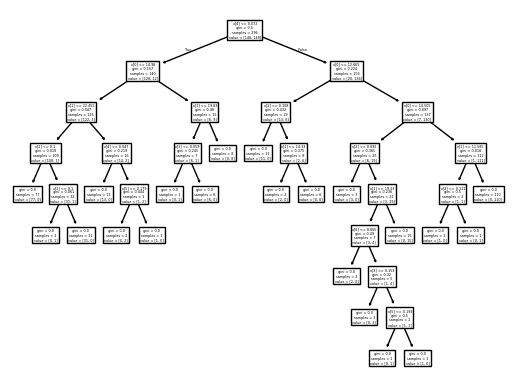

In [24]:
tree.plot_tree(clf2)

In [25]:
y_pred2 = clf.predict(X_test)

In [26]:
matriz2 = confusion_matrix(y_test, y_pred2)

<Axes: >

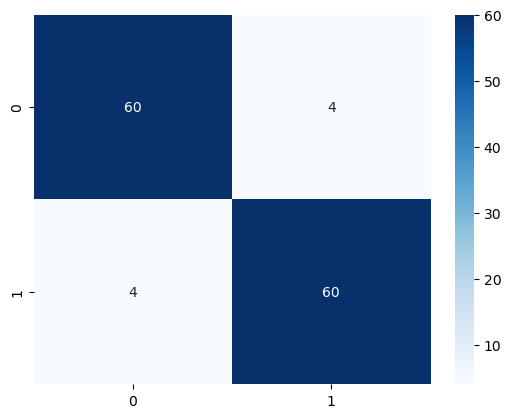

In [27]:
sns.heatmap(data = matriz2, annot = True, cmap = 'Blues')

In [28]:
accuracy_score(y_test, y_pred2)

0.9375

In [29]:
recall_score(y_test, y_pred2, average='weighted')

0.9375

In [30]:
precision_score(y_test, y_pred2, average='weighted')

0.9375